In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
import io

import imghdr
import os

print(tf.__version__)

2.2.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!python --version

Python 3.6.9


In [ ]:
# ATTENTION: Please do not alter any of the provided code in the exercise. Only add your own code where indicated
# ATTENTION: Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position.
# ATTENTION: Please use the provided epoch values when training.

# In this exercise you will train a CNN on the FULL Cats-v-dogs dataset
# This will require you doing a lot of data preprocessing because
# the dataset isn't split into training and validation for you
# This code block has all the required inputs
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd

# Using Drive Mounting Instead (Tutorial: https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92)

To mount Google Drive:
- Run the code below
- Click the URL 
- Sign in & click Allow to get the authorization code
- Copy the authorization code and paste it to:
  Enter your authorization code: 
  ____________

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
local_zip = '/content/drive/My Drive/Bangkit_Final_Project/makeup_images.zip'

In [ ]:
#local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/content/')
zip_ref.close()

In [ ]:
print(len(os.listdir('/content/data/makeup/')))
print(len(os.listdir('/content/data/no_makeup/')))
#print(len(os.listdir('/content/data/data/makeup/')))
#print(len(os.listdir('/content/data/data/no_makeup/')))

1062
444


In [ ]:

try:
    #YOUR CODE GOES HERE
    #cur_dir = f"{getcwd()}/../"
    #print(cur_dir)
    #base_dir = f"{getcwd()}/../tmp/cats-v-dogs/"
    base_dir = "/content/m_or_nom_4/"

    print(base_dir)
    os.makedirs(base_dir)
    print(len(os.listdir(base_dir)))
    print("that")
    train_dir = os.path.join(base_dir, 'training')
    validation_dir = os.path.join(base_dir, 'testing')
    
    train_m_dir = os.path.join(train_dir, 'makeup')
    train_nom_dir = os.path.join(train_dir, 'no_makeup')
    
    validation_m_dir = os.path.join(validation_dir, 'makeup')
    validation_nom_dir = os.path.join(validation_dir, 'no_makeup')
    
    os.makedirs(train_m_dir)
    os.makedirs(train_nom_dir)
    os.makedirs(validation_m_dir)
    os.makedirs(validation_nom_dir)
    # Testing:
    train_m_fnames = os.listdir(train_m_dir)
    print("PRINTING")
    print(train_m_fnames) #[:10])
except OSError:
    print("ERROR")
    print(OSError)
    pass

/content/m_or_nom_4/
0
that
PRINTING
[]


In [ ]:
# Write a python function called split_data which takes
# a SOURCE directory containing the files
# a TRAINING directory that a portion of the files will be copied to
# a TESTING directory that a portion of the files will be copie to
# a SPLIT SIZE to determine the portion
# The files should also be randomized, so that the training set is a random
# X% of the files, and the test set is the remaining files
# SO, for example, if SOURCE is PetImages/Cat, and SPLIT SIZE is .9
# Then 90% of the images in PetImages/Cat will be copied to the TRAINING dir
# and 10% of the images will be copied to the TESTING dir
# Also -- All images should be checked, and if they have a zero file length,
# they will not be copied over
#
# os.listdir(DIRECTORY) gives you a listing of the contents of that directory
# os.path.getsize(PATH) gives you the size of the file
# copyfile(source, destination) copies a file from source to destination
# random.sample(list, len(list)) shuffles a list
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
# YOUR CODE STARTS HERE
    print("SPLITTING DATA")
    if os.path.getsize(SOURCE) == 0:
        print("FILE SIZE 0 ERROR")
        return 0
    else:
        source_data = os.listdir(SOURCE)
        source_len = len(source_data)
        print("SOURCE LENGTH: "+str(source_len))
        print(source_data[:3])
        #print(len(source_data))
        train_end = source_len*90//100
        print("train end")
        print(train_end)
        source_data = random.sample(source_data, len(source_data))
        train_fname = source_data[:train_end]
        test_fname = source_data[train_end:]
        for fname in train_fname:  
            print(fname)
            print(SOURCE+fname) #(os.path.join(SOURCE, fname))
            copyfile(SOURCE+fname, TRAINING+fname)
        for fname in test_fname:   
            copyfile(SOURCE+fname, TESTING+fname)
        #copyfile(SOURCE, os.path(TESTING))
        

    #print(os.listdir(SOURCE))
# YOUR CODE ENDS HERE


M_SOURCE_DIR = '/content/data/makeup/'
TRAINING_M_DIR = '/content/m_or_nom_4/training/makeup/'
TESTING_M_DIR = '/content/m_or_nom_4/testing/makeup/'
NOM_SOURCE_DIR = '/content/data/no_makeup/'
TRAINING_NOM_DIR = '/content/m_or_nom_4/training/no_makeup/'
TESTING_NOM_DIR = '/content/m_or_nom_4/testing/no_makeup/'

split_size = .9
split_data(M_SOURCE_DIR, TRAINING_M_DIR, TESTING_M_DIR, split_size)
split_data(NOM_SOURCE_DIR, TRAINING_NOM_DIR, TESTING_NOM_DIR, split_size)

SPLITTING DATA
SOURCE LENGTH: 1062
['makeup840.jpeg', 'makeup724.jpeg', 'makeup1154.jpeg']
train end
955
makeup228.jpeg
/content/data/makeup/makeup228.jpeg
makeup854.jpeg
/content/data/makeup/makeup854.jpeg
makeup1210.jpeg
/content/data/makeup/makeup1210.jpeg
makeup432.jpeg
/content/data/makeup/makeup432.jpeg
makeup374.jpeg
/content/data/makeup/makeup374.jpeg
makeup152.jpeg
/content/data/makeup/makeup152.jpeg
makeup282.jpeg
/content/data/makeup/makeup282.jpeg
makeup1183.jpeg
/content/data/makeup/makeup1183.jpeg
makeup442.jpeg
/content/data/makeup/makeup442.jpeg
makeup929.jpeg
/content/data/makeup/makeup929.jpeg
makeup630.jpeg
/content/data/makeup/makeup630.jpeg
makeup954.jpeg
/content/data/makeup/makeup954.jpeg
makeup639.jpeg
/content/data/makeup/makeup639.jpeg
makeup994.jpeg
/content/data/makeup/makeup994.jpeg
makeup167.jpeg
/content/data/makeup/makeup167.jpeg
makeup1108.jpeg
/content/data/makeup/makeup1108.jpeg
makeup473.jpeg
/content/data/makeup/makeup473.jpeg
makeup1167.jpeg
/conte

In [ ]:
print(len(os.listdir(TRAINING_M_DIR)))
print(len(os.listdir(TESTING_M_DIR)))
print(len(os.listdir(TRAINING_NOM_DIR)))
print(len(os.listdir(TESTING_NOM_DIR)))
#print(len(os.listdir('/content/m_or_nom_3/testing/makeup/')))
# Expected output:
# 1350
# 1350
# 150
# 150

955
107
399
45


# IMAGE DATA GENERATOR

In [ ]:
# REGITA'S DATA GENERATOR
TRAINING_DIR = "/content/m_or_nom_4/training/" #YOUR CODE HERE
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=40,
    width_shift_range=0.5, #THIS
    height_shift_range=0.5, #THIS
    shear_range=0.5, #THIS
    zoom_range=0.5, #THIS
    horizontal_flip=True,
    fill_mode='nearest'
) #YOUR CODE HERE

# NOTE: YOU MUST USE A BATCH SIZE OF 10 (batch_size=10) FOR THE 
# TRAIN GENERATOR.
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150, 150),
    batch_size=100, #THIS
    class_mode='binary'
)
#YOUR CODE HERE

VALIDATION_DIR = "/content/m_or_nom_4/testing/" #YOUR CODE HERE
validation_datagen = ImageDataGenerator(
    rescale=1./255
) #YOUR CODE HERE

# NOTE: YOU MUST USE A BACTH SIZE OF 10 (batch_size=10) FOR THE 
# VALIDATION GENERATOR.
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150, 150),
    batch_size=10,
    class_mode='binary'
)#YOUR CODE HERE



# Expected Output:
# Found 2700 images belonging to 2 classes.
# Found 300 images belonging to 2 classes.

Found 1354 images belonging to 2 classes.
Found 152 images belonging to 2 classes.


In [ ]:
TRAINING_DIR = "/content/m_or_nom_4/training/" #YOUR CODE HERE
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=40,
    width_shift_range=0.2, 
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
) #YOUR CODE HERE

# NOTE: YOU MUST USE A BATCH SIZE OF 10 (batch_size=10) FOR THE 
# TRAIN GENERATOR.
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150, 150),
    batch_size=10,
    class_mode='binary'
)
#YOUR CODE HERE

VALIDATION_DIR = "/content/m_or_nom_4/testing/" #YOUR CODE HERE
validation_datagen = ImageDataGenerator(
    rescale=1./255
) #YOUR CODE HERE

# NOTE: YOU MUST USE A BACTH SIZE OF 10 (batch_size=10) FOR THE 
# VALIDATION GENERATOR.
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150, 150),
    batch_size=10,
    class_mode='binary'
)#YOUR CODE HERE



# Expected Output:
# Found 2700 images belonging to 2 classes.
# Found 300 images belonging to 2 classes.

Found 1354 images belonging to 2 classes.
Found 152 images belonging to 2 classes.


# Adding the MobileNetV2 as the Base Model
From this tutorial: https://colab.research.google.com/github/tensorflow/examples/blob/master/community/en/flowers_tf_lite.ipynb#scrollTo=19IQ2gqneqmS

In [ ]:
IMG_SHAPE = (150, 150, 3)
# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


Feature Extraction

In [ ]:
base_model.trainable = False

## DEFINING A KERAS MODEL

WITHOUT Base Model

In [ ]:
# DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
# USE AT LEAST 3 CONVOLUTION LAYERS
model = tf.keras.models.Sequential([
# YOUR CODE HERE
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', 
                          input_shape=(150, 150,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       7

WITH BASE MODEL

In [ ]:
model_1 = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
  #tf.keras.layers.Dropout(0.2),
  #tf.keras.layers.GlobalAveragePooling2D(),
  #tf.keras.layers.Dense(5, activation='softmax')
])

model_1.summary()

model_1.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 32)          368672    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               16896     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 513       
Total params: 2,644,065
Trainable params: 386,081
Non-trainable params: 2,257,984
______________________________________

WITHOUT Base Model

In [ ]:
history = model.fit_generator(train_generator,
                              epochs=3,
                              verbose=1,
                              validation_data=validation_generator)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/3
136/136 [==============================] - 37s 273ms/step - loss: 0.6314 - acc: 0.6965 - val_loss: 0.6680 - val_acc: 0.7039
Epoch 2/3
136/136 [==============================] - 37s 270ms/step - loss: 0.6479 - acc: 0.7053 - val_loss: 0.6063 - val_acc: 0.7039
Epoch 3/3
136/136 [==============================] - 36s 268ms/step - loss: 0.6082 - acc: 0.7053 - val_loss: 0.5665 - val_acc: 0.7039


WITH Base Model

In [ ]:
history_1 = model_1.fit_generator(train_generator,
                              epochs=10,
                              verbose=1,
                              validation_data=validation_generator)


Epoch 1/10
136/136 [==============================] - 32s 239ms/step - loss: 0.7037 - acc: 0.6721 - val_loss: 0.5246 - val_acc: 0.7039
Epoch 2/10
136/136 [==============================] - 32s 234ms/step - loss: 0.5668 - acc: 0.6950 - val_loss: 0.5188 - val_acc: 0.7039
Epoch 3/10
136/136 [==============================] - 32s 233ms/step - loss: 0.5570 - acc: 0.6987 - val_loss: 0.5359 - val_acc: 0.7237
Epoch 4/10
136/136 [==============================] - 32s 233ms/step - loss: 0.5320 - acc: 0.7326 - val_loss: 0.5323 - val_acc: 0.7434
Epoch 5/10
136/136 [==============================] - 32s 234ms/step - loss: 0.5187 - acc: 0.7437 - val_loss: 0.5101 - val_acc: 0.7105
Epoch 6/10
136/136 [==============================] - 32s 234ms/step - loss: 0.5292 - acc: 0.7149 - val_loss: 0.5477 - val_acc: 0.6908
Epoch 7/10
136/136 [==============================] - 32s 234ms/step - loss: 0.5242 - acc: 0.7415 - val_loss: 0.5263 - val_acc: 0.7500
Epoch 8/10
136/136 [==============================] - 3

In [ ]:
local_drive = '/content/drive/My Drive/Bangkit_Final_Project/'

In [ ]:
# Saving the TEST Model
model_1.save(local_drive+'makeup_test_v2')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Bangkit_Final_Project/makeup_test_v2/assets


In [ ]:
# TFLITE
converter = tf.lite.TFLiteConverter.from_saved_model(local_drive+'makeup_test_v2')
tflite_model = converter.convert()
open(local_drive+"converted_makeup_model_v2.tflite", "wb").write(tflite_model)

10394252

In [ ]:
# As SavedModel Format 

In [ ]:
model_1.save('makeup_model_1')

INFO:tensorflow:Assets written to: makeup_model_1/assets


INFO:tensorflow:Assets written to: makeup_model_1/assets


In [ ]:
tf.train.write_graph(session.graph.as_graph_def(),
                                     "makeup_model_1.h5",
                                     'makeup_model_1_pb.pb',
                                     as_text=False)

AttributeError: ignored

In [ ]:
# AS JSON:
# serialize model to JSON
model_json = model_1.to_json()
with open("makeup_model_1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("makeup_model_weights_1.h5")
print("Saved model to disk")
 
# later...
""""
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
"""""

In [ ]:
# KERAS H5 Model
model_1.save('makeup_model_1.h5')

In [ ]:
# later on:
# model = load_model('makeup_model_1.h5')

In [ ]:
!pip install firebase-admin

In [ ]:
# Storing model in Firebase Storage
import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore

# Use a service account
if (not len(firebase_admin._apps)):
	cred = credentials.Certificate(r'/content/drive/My Drive/Bangkit_Final_Project/bangkit-makeup-firebase-adminsdk-xxkse-0853025fb0.json')
 #(r'service_account.json')
	firebase_admin.initialize_app(
    cred,
    options={
      'storageBucket': 'gs://bangkit-makeup.appspot.com',
  })
db = firestore.client()

In [ ]:
# Slightly different way to create the model (https://medium.com/swlh/deploy-tensorflow-2-models-on-google-cloud-ai-platform-and-get-predictions-312f7993a43c)

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
# LOAD MODEL_1

In [ ]:
model_1_loaded = tf.keras.models.load_model(local_drive+'/makeup_test_v2')

In [ ]:
model_1_loaded.summary()

In [ ]:
CLOUD_PROJECT = 'bangkit-makeup'
BUCKET = 'gs://bangkit-makeup.appspot.com'

In [ ]:
model_1_loaded.save(BUCKET+'/makeup_test_/makeup_test_v4', save_format='tf')

#model_1.save(BUCKET+'/bm_trial_1/bm_trial_1', save_format='tf')

In [ ]:
!gcloud config set project $CLOUD_PROJECT

In [ ]:
MODEL = 'makeup_test_model' #'bm_model_trial_1'
!gcloud ai-platform models create $MODEL

In [ ]:
# Okay, above was to create the model in the api. NOW CREATE VERSION.

In [ ]:
VERSION = 'v1'
MODEL_DIR = BUCKET+'/makeup_test_/makeup_test_v4'
#'/makeup_test_model_bucket/makeup_test_v2'

In [ ]:
!gcloud ai-platform versions create $VERSION \
--model $MODEL \
--origin $MODEL_DIR \
--runtime-version=2.1 \
--python-version=3.7

In [ ]:
# If you’re using a notebook, create a new cell at the end and add the following script. This will enable the usage of your firebase account:


In [ ]:
# Upload the model to Firebase using Project ID look at Firebase = bangkit-makeup

from sklearn.externals import joblib
from firebase_admin import storage
#joblib.dump(model_1, 'makeup_model_1.joblib')
# Save the H5 VERSION
bucket = storage.bucket(name='bangkit-makeup.appspot.com')
b = bucket.blob('makeup_model_1-v/makeup_model_1.h5')
b.upload_from_filename('makeup_model_1.h5')
#upload_from_filename('makeup_model_1.joblib')
print('makeup_model_1 uploaded!')

In [ ]:
bucket = storage.bucket(name='bangkit-makeup.appspot.com')
b = bucket.blob('makeup_model_1_pub/saved_model.pub')
b.upload_from_filename('makeup_model_1/saved_model.pb')
#upload_from_filename('makeup_model_1.joblib')
print('makeup_model_1 uploaded!')

In [ ]:
bucket = storage.bucket(name='bangkit-makeup.appspot.com')
b = bucket.blob('makeup_model_1_pub_2/')
b.upload_from_filename('makeup_model_1')
#upload_from_filename('makeup_model_1.joblib')
print('makeup_model_1 uploaded!')

# Deploying the Models

In [ ]:
# NO NEED, APP HAS BEEN INITIALIZED
import firebase_admin
from firebase_admin import ml
from firebase_admin import credentials

firebase_admin.initialize_app(
  credentials.Certificate('/content/drive/My Drive/Bangkit_Final_Project/bangkit-makeup-firebase-adminsdk-xxkse-0853025fb0.json'),
  options={
      'storageBucket': 'gs://bangkit-makeup.appspot.com',
  })


In [ ]:
# 1ST OPTION: CONVERTING TO TFLITE AND THEN UPLOAD

In [ ]:
# Convert the SAVED MODEL (pb / pbtxt) model to TensorFlow Lite and upload it to Cloud Storage
# source = ml.TFLiteGCSModelSource.from_saved_model('content/makeup_model_1.h5') 

In [ ]:
import tensorflow as tf

# Load a Keras model, convert it to TensorFlow Lite, and upload it to Cloud
# Storage
#model = tf.keras.models.load_model('makeup_model_1.h5')
#source = ml.TFLiteGCSModelSource.from_keras_model(model)

In [ ]:
# 2ND OPTION: UPLOADING TF / KERAS MODEL AS IT IS

In [ ]:
history_1 = model_1.fit_generator(train_generator,
                              epochs=3,
                              verbose=1,
                              validation_data=validation_generator)


WITHOUT Base Model

Text(0.5, 1.0, 'Training and validation loss')

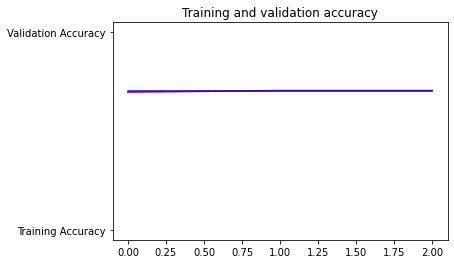

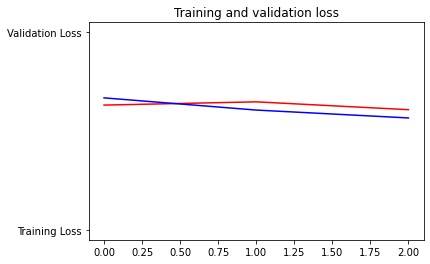

In [ ]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

WITH Base Model

Text(0.5, 1.0, 'Training and validation loss')

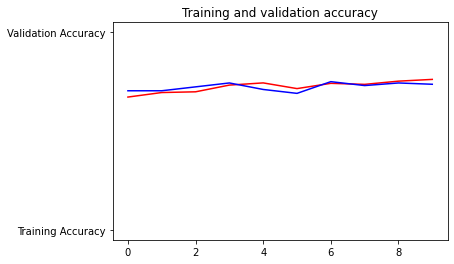

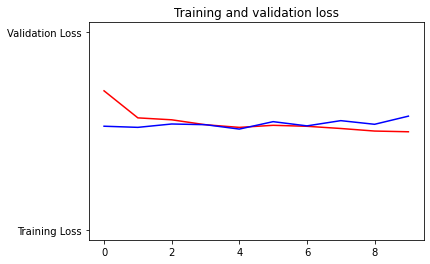

In [ ]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history_1.history['acc']
val_acc=history_1.history['val_acc']
loss=history_1.history['loss']
val_loss=history_1.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

# Finetuning

In [ ]:
base_model.trainable = True

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

WITH Base Model AFTER Fine Tuning

In [ ]:
model_1.summary()

model_1.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [ ]:
print('Number of trainable variables = {}'.format(len(model.trainable_variables)))

In [ ]:
history_1_fine = model_1.fit_generator(train_generator,
                              epochs=5,
                              verbose=1,
                              validation_data=validation_generator)


In [ ]:
history_1_fine = model_1.fit_generator(train_generator,
                              epochs=20,
                              verbose=1,
                              validation_data=validation_generator)


# Converting to TFLite

In [ ]:
saved_model_dir = '/content/save/fine_tuning'
tf.saved_model.save(model_1, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
from google.colab import files

files.download('model.tflite')
#files.download('labels.txt')

## CREATING THE CLOUD FUNCTION

In [ ]:
!npm install -g firebase-tools

In [ ]:
!pip install n

In [ ]:
!firebase login

In [ ]:
loaded_model = tf.keras.models.load_model(local_drive+'/makeup_test_v2')
#model_1.save(BUCKET+'/bm_trial_1/bm_trial_1', save_format='tf')

In [ ]:
loaded_model.summary()

In [ ]:
file = tf.keras.utils.get_file(
    "mountains.jpg",
    "https://storage.googleapis.com/gcptutorials.com/examples/mountains.jpg")

https://www.gcptutorials.com/post/image-classification-with-mobilenetv2-model

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

file = tf.keras.utils.get_file(
    "test_file.jpeg",
    "https://i.ytimg.com/vi/1thjXzmblyI/maxresdefault.jpg")
img = tf.keras.preprocessing.image.load_img(file, target_size=[150,150,3]
                                            )
plt.imshow(img)
plt.axis('off')


In [ ]:
x = tf.keras.preprocessing.image.img_to_array(img)
print(x.shape)
x = tf.keras.applications.mobilenet.preprocess_input(
    x[tf.newaxis,...])
print(x.shape)


In [ ]:
x

In [ ]:
loaded_model.predict(x)